# Connections between MKs 
## **MK = Member of the knesset  (חבר כנסת)
Based on transcripts of the knesset committees.<br/>
The work was done in the 'public knowledge workshop' hackathon and won 3rd place prize.

In [1]:
import pandas as pd
import networkx as nx
import matplotlib
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings('ignore')

%matplotlib inline
plt.rcParams["figure.figsize"] = (15,15)

G = nx.read_gml('./Mk_connections_graph')
G.remove_node('האירק')

In [2]:
#Reverting the Mks names since hebrew is printed reversed :)
def reverse(some_list):
    return [item[::-1] for item in some_list]

def join_reverse_text(text):
    return "".join(text[::-1])

def print_reversed(dictionary):
    dictionary = dict(dictionary)
    return [(key[::-1] , value) for (key, value) in sorted(dictionary.items() ,key=lambda x: x[1] ,reverse=True)]

def plot_dict(dictionary, title, xlabel, ylabel):
    dictionary = sorted(dict(dictionary).items(),key=lambda x: x[1] ,reverse=True)[:10]
    p = pd.DataFrame(dictionary, columns=[ylabel, xlabel])
    plt.style.use('seaborn-darkgrid')
    plt.figure(figsize=(4,4))
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    sns.set_palette(sns.color_palette("Set2"))
    sns.barplot(data=p, x =xlabel, y=ylabel, orient='h')

In [3]:
# Zeev alkin was added too since he is in charge of the Knesset committees so also talks oftern as part of his job.
heads_of_committees = set(['מיקי זוהר', 'משה גפני', 'איתן כבל'
                       ,'אבי דיכטר', 'יואב קיש', 'דוד ביטן', 'צחי הנגבי',
                       'דוד אמסלם', 'ניסן סלומינסקי', 'אברהם נגוסה', 'יעקב מרגי',
                       'אלי אלאלוף' ,'שלי יחימוביץ' ,'עאידה תומא סלימאן',
                      'קארין אלהרר', 'אורי מקלב', 'זאב אלקין', 'איל בן ראובן', 'יצחק וקנין'])


def without_committee_heads(mks_list):
    return [(mk,d) for (mk,d) in mks_list if mk not in heads_of_committees]

def without_committee_heads2(mks_list):
    return [(mk,d) for (mk,d) in mks_list if join_reverse_text(mk) not in heads_of_committees]

In [4]:
pos = nx.spring_layout(G, k=1, scale=10000)

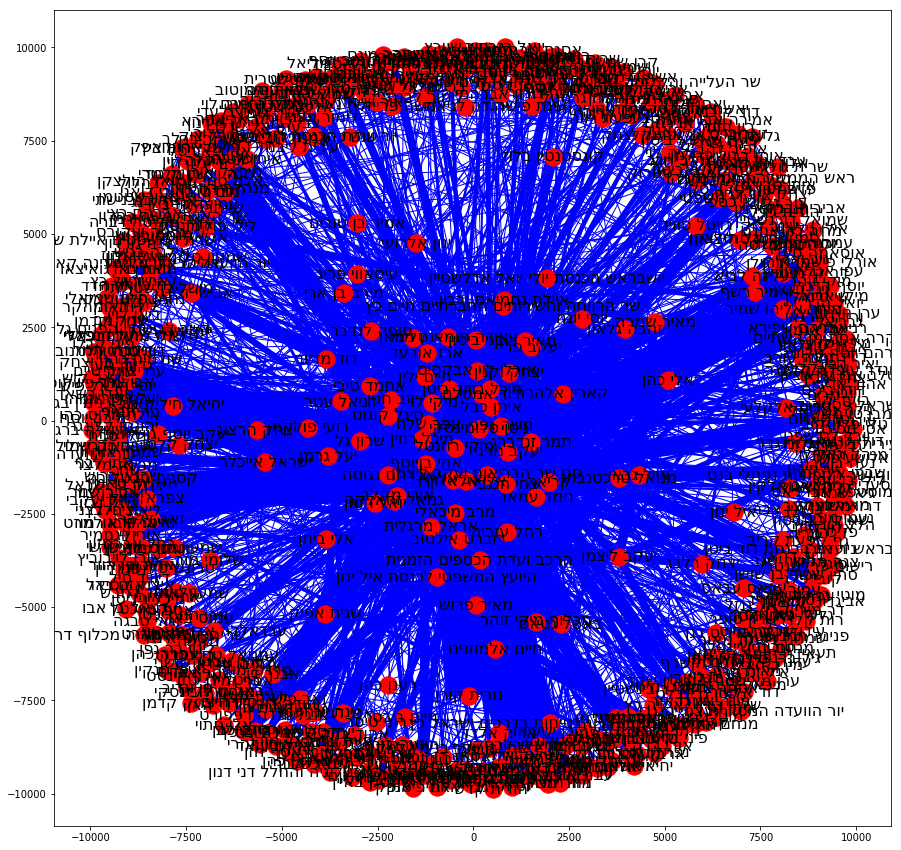

In [5]:
def draw_graph(G, arrows=False):
    nx.draw_networkx_nodes(G, pos)
    nx.draw_networkx_labels(G, pos, font_size=16)

    weights = set([])
    for n1,n2 in G.edges():
        weight = G.get_edge_data(n1,n2)['weight']
        weights.add(weight)

    for weight in weights:
        edges_with_weight = [edge for edge in G.edges() if weight == G.get_edge_data(*edge)['weight']]
        nx.draw_networkx_edges(G, pos, edgelist=edges_with_weight, width=weight, arrows=arrows, edge_color='b', arrow_style='->')

draw_graph(G)

# Degree of node:

## The MKs with the highest total degree

In [5]:
total_deg = print_reversed(G.degree())[:10]
total_deg

[('איתן כבל', 128),
 ('יעקב מרגי', 122),
 ('דוד אמסלם', 119),
 ('ניסן סלומינסקי', 114),
 ('משה גפני', 112),
 ('אלי אלאלוף', 105),
 ('זאב אלקין', 104),
 ('אורי מקלב', 77),
 ('אברהם נגוסה', 71),
 ('יצחק וקנין', 67)]

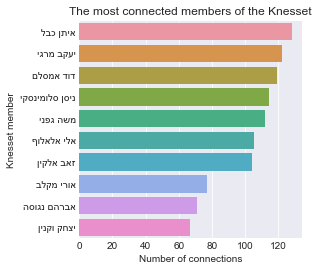

In [6]:
plot_dict(G.degree(),
          "The most connected members of the Knesset",
          xlabel="Number of connections",
          ylabel="Knesset member")

### We can see that these are mostly the head of the committees, which makes sense.. <br/>Let's remove them

In [7]:
without_committee_heads(print_reversed(G.degree()))[:10]

[('מיקי רוזנטל', 65),
 ('מיקי לוי', 62),
 ('חיים ילין', 57),
 ('מיכל רוזין', 50),
 ('תמר זנדברג', 48),
 ('עפר שלח', 45),
 ('יעקב פרי', 45),
 ('אראל מרגלית', 43),
 ('אורלי לוי אבקסיס', 43),
 ('דב חנין', 40)]

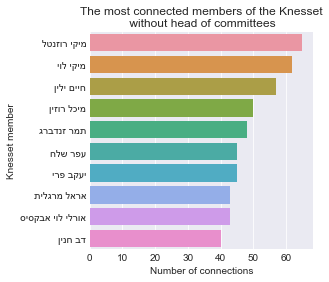

In [8]:
plot_dict(without_committee_heads2(G.degree()),
          "The most connected members of the Knesset\n without head of committees",
          xlabel="Number of connections",
          ylabel="Knesset member")

## The MKs with the highest in degree
The mks that are spoken to the most

In [10]:
print_reversed(G.in_degree())[:10]

[('יעקב מרגי', 52),
 ('דוד אמסלם', 51),
 ('ניסן סלומינסקי', 47),
 ('משה גפני', 46),
 ('איתן כבל', 44),
 ('אלי אלאלוף', 44),
 ('זאב אלקין', 37),
 ('אברהם נגוסה', 34),
 ('אורי מקלב', 28),
 ('מיקי רוזנטל', 27)]

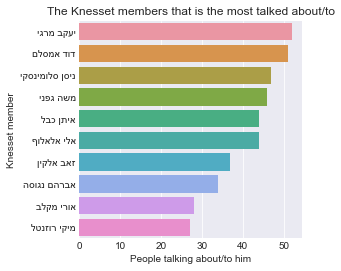

In [11]:
plot_dict(G.in_degree(),
          "The Knesset members that is the most talked about/to",
          xlabel="People talking about/to him",
          ylabel="Knesset member")

Without head of the committees

In [12]:
without_committee_heads(print_reversed(G.in_degree()))[:10]

[('מיקי רוזנטל', 27),
 ('מיקי לוי', 25),
 ('עפר שלח', 24),
 ('אחמד טיבי', 23),
 ('חיים ילין', 23),
 ('אראל מרגלית', 21),
 ('יעקב פרי', 21),
 ('זהבה גלאון', 20),
 ('מיכל רוזין', 20),
 ('סדר היום', 20)]

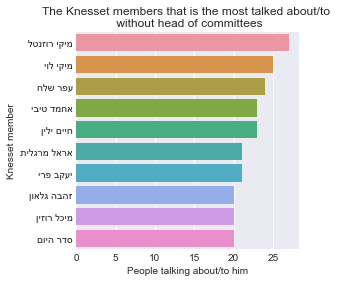

In [13]:
plot_dict(without_committee_heads2(G.in_degree()),
          "The Knesset members that is the most talked about/to \n without head of committees",
          xlabel="People talking about/to him",
          ylabel="Knesset member")

## The MKs with the highest out degree
The mks that speaks to others the most

In [14]:
print_reversed(G.out_degree())[:10]

[('איתן כבל', 84),
 ('יעקב מרגי', 70),
 ('דוד אמסלם', 68),
 ('זאב אלקין', 67),
 ('ניסן סלומינסקי', 67),
 ('משה גפני', 66),
 ('אלי אלאלוף', 61),
 ('אורי מקלב', 49),
 ('יצחק וקנין', 41),
 ('מיקי רוזנטל', 38)]

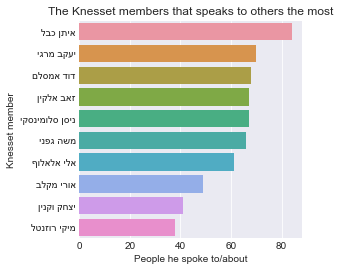

In [15]:
plot_dict(G.out_degree(),
          "The Knesset members that speaks to others the most",
          xlabel="People he spoke to/about",
          ylabel="Knesset member")

In [16]:
without_committee_heads(print_reversed(G.out_degree()))[:10]

[('מיקי רוזנטל', 38),
 ('מיקי לוי', 37),
 ('חיים ילין', 34),
 ('מיכל רוזין', 30),
 ('אתי בןיוסף', 30),
 ('דב חנין', 28),
 ('תמר זנדברג', 28),
 ('יעקב פרי', 24),
 ('אורלי לוי אבקסיס', 23),
 ('אראל מרגלית', 22)]

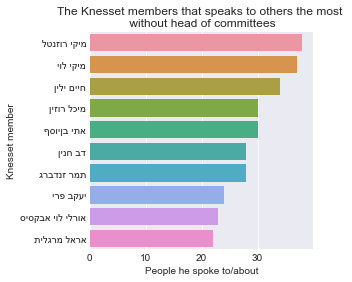

In [17]:
plot_dict(without_committee_heads2(G.out_degree()),
          "The Knesset members that speaks to others the most \n without head of committees",
          xlabel="People he spoke to/about",
          ylabel="Knesset member")

## The MKs with the highest centrality
The most central mks

In [18]:
print_reversed(nx.degree_centrality(G))[:10]

[('איתן כבל', 0.19364599092284418),
 ('יעקב מרגי', 0.18456883509833585),
 ('דוד אמסלם', 0.1800302571860817),
 ('ניסן סלומינסקי', 0.17246596066565809),
 ('משה גפני', 0.16944024205748864),
 ('אלי אלאלוף', 0.1588502269288956),
 ('זאב אלקין', 0.1573373676248109),
 ('אורי מקלב', 0.11649016641452345),
 ('אברהם נגוסה', 0.10741301059001514),
 ('יצחק וקנין', 0.10136157337367625)]

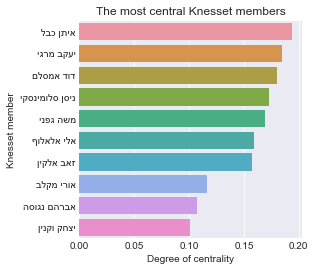

In [19]:
plot_dict(nx.degree_centrality(G),
          "The most central Knesset members",
          xlabel="Degree of centrality",
          ylabel="Knesset member")

In [20]:
without_committee_heads(print_reversed(nx.degree_centrality(G)))[:10]

[('מיקי רוזנטל', 0.09833585476550681),
 ('מיקי לוי', 0.09379727685325265),
 ('חיים ילין', 0.08623298033282904),
 ('מיכל רוזין', 0.07564296520423601),
 ('תמר זנדברג', 0.07261724659606657),
 ('עפר שלח', 0.0680786686838124),
 ('יעקב פרי', 0.0680786686838124),
 ('אראל מרגלית', 0.06505295007564296),
 ('אורלי לוי אבקסיס', 0.06505295007564296),
 ('דב חנין', 0.060514372163388806)]

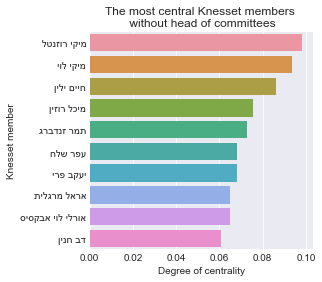

In [21]:
plot_dict(without_committee_heads2(nx.degree_centrality(G).items()),
          "The most central Knesset members \n without head of committees",
          xlabel="Degree of centrality",
          ylabel="Knesset member")

# Who did I talk to/about

In [22]:
def draw_out_subgraph_of_node(some_node, arrows=False):
    some_node = some_node[::-1]
    neighbors = list(G.neighbors(some_node))
    neighbors.append(some_node)
    draw_graph(G.subgraph(neighbors), arrows)

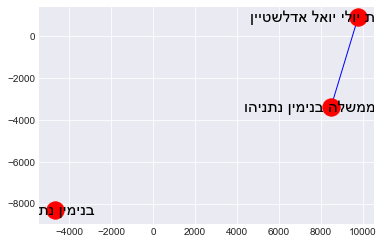

In [25]:
draw_out_subgraph_of_node('ראש הממשלה בנימין נתניהו')
draw_out_subgraph_of_node('בנימין נתניהו')

Benjamin Netanyahu doesn't attend the Knesset committees and even if he do he only talks to Yuli Edelstein.

# Who talked about me

In [26]:
def draw_in_subgraph_of_node(some_node, arrows=False):
    some_node = some_node[::-1]
    neighbors = list(G.to_undirected().neighbors(some_node))
    neighbors.append(some_node)
    draw_graph(G.subgraph(neighbors), arrows)

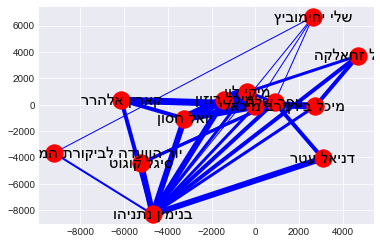

In [27]:
draw_in_subgraph_of_node('בנימין נתניהו')

A lot of people are talking about Benjamin Netanyahu. (Even though the committees should be subject-based)

Just to name a few:
- Karin Elarar was head committee of state audit. Benjamin Netanyahu is suspected with fraud.
- Jamal Zhalaka is talking about Benjamin Netanyahu because he is not satisfied with the state of Israeli-Arabs.

# Who likes to talk about himself a lot?

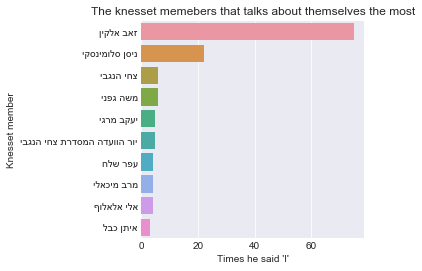

In [28]:
mks_talking_about_themselves = G.nodes_with_selfloops()
mks_talking_about_themselves = [(x, G.get_edge_data(x,x)['weight']) for x in mks_talking_about_themselves]
plot_dict(mks_talking_about_themselves,
         xlabel="Times he said 'I'",
         ylabel= "Knesset member",
         title="The knesset memebers that talks about themselves the most")